# pyco API

Bibliotheek voor Civiele Techniek constructie onderwijs. Geschreven door Jara van Veldhoven 2020-2022.

Begin alle documenten met onderstaande import.

In [1]:
import pyco as pc

De pyco model is afhankelijk van drie externe bibliotheken:

* numpy (https://numpy.org)
* pandas (https://pandas.pydata.org/)
* matplotlib (https://matplotlib.org/)

Deze bibliotheken zijn beschikbaar via pyco:

> pc.np # numpy
>  
> pc.pd # pandas 
> 
> pc.plt # pyplot module van matplotlib

## Inhoud
Alle pyco objecten beginnen met een hoofdletter. Alle functies en eigenschappen beginnen met een kleine letter.

* [Waarde](#Waarde)
* [Vector](#Vector)
* [Knoop](#Knoop)
* [Lijn](#Lijn)
* [Vorm](#Vorm)
    - [Rechthoek](#Rechthoek)
    - [Cirkel](#Cirkel)
* [Materiaal](#Materiaal)
* [pyco functies en eigenschappen](#Functies)

## Waarde
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [2]:
pc.Waarde.print_help()


+----------+
|  Waarde  |
+----------+

Bevat een getal en bijhorende eenheid.

AANMAKEN WAARDE
    w = Waarde(getal)
    w = Waarde(getal, eenheid_tekst)

AANPASSEN EENHEID           omzetten van eenheid naar andere eenheid
    w.eenheid               huidige eenheid opvragen (tekst of None)
    w.eenheid = 'N/mm2'     eenheid aanpassen
    w = w['N/mm2']          eenheid aanpassen, retourneert object
    w.gebruik_eenheid('mm') eenheid aanpassen, retourneert object
    w.eh('mm')              eenheid aanpassen, retourneert object
    w = w.N_mm2             kan voor een aantal standaard gevallen (zie lijst onderaan)

AANPASSEN AFRONDING         pas afgerond wanneer waarde wordt getoond als tekst
    w = w[0]                kan voor alle gehele getallen
    w = w._0                kan voor 0 t/m 9 (cijfers achter de komma)

OMZETTEN WAARDE NAAR TEKST  resulteert in nieuw string object
                                -> gebruikt afronding indien opgegeven
    tekst = str(w)          o

In [3]:
W = pc.Waarde
print(f"12 dm + 58 cm = { (W(12).dm + W(58).cm).mm }")
print(f"pi radialen komt overeen met: { W(3.141592654, 'rad').deg }")
print(f"1 meter per 10 graden Celsius komt overen met: { W(1/10, 'm/C')['cm/F'] }")

12 dm + 58 cm = 1780.0000000000002 mm
pi radialen komt overeen met: 180.00000002350313 deg
1 meter per 10 graden Celsius komt overen met: 5.5555555555555545 cm/F


## Vector
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [4]:
pc.Vector.print_help()


+----------+
|  Vector  |
+----------+

Bevat een lijst van getallen of Waarde objecten met allen dezelfde eenheid.

AANMAKEN VECTOR             eenheid van 1e component, geldt voor geheel
    v = Vector(waarde1, waarde2, ...)          waarde: float, int of Waarde
    v = Vector([waarde1, waarde2, ...])              
    v = Vector(numpy_array)             array wordt indien nodig 1D gemaakt

AANPASSEN EENHEID           omzetten van eenheid naar andere eenheid
    v.eenheid               huidige eenheid opvragen (tekst of None)
    v.eenheid = 'N/mm2'     eenheid aanpassen
    v.gebruik_eenheid('m')  eenheid aanpassen, retourneert object
    v.eh('m')               eenheid aanpassen, retourneert object
    v = v.N_mm2             kan voor een aantal standaard gevallen (zie lijst onderaan)

OMZETTEN VECTOR NAAR TEKST  resulteert in nieuw string object
    tekst = str(v)          of automatisch met bijvoorbeeld print(w)
    tekst = format(v,'.2f') format configuratie meegeven voor getal

In [5]:
pc.Vector(0, 200, 1).eh('cm')

Vector(Waarde(0.0, 'cm'), Waarde(200.0, 'cm'), Waarde(1.0, 'cm'))

## Knoop
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [6]:
pc.Knoop.print_help()


+---------+
|  Knoop  |
+---------+

Bevat een lijst van getallen of Waarde (x, y, en/of z) met lengte eenheid.

AANMAKEN KNOOP              eenheid van 1e component, geldt voor geheel
    k = Knoop([x_waarde, y_waarde, z_waarde])   kan oneindig veel dimensies

AANPASSEN EENHEID           omzetten van eenheid naar andere eenheid
    k.eenheid               huidige eenheid opvragen (tekst of None)
    k.eenheid = 'N/mm2'     eenheid aanpassen
    k.gebruik_eenheid('m')  zelfde als bovenstaande, retourneert object

OMZETTEN KNOOP NAAR TEKST   resulteert in nieuw string object
    tekst = str(k)          of automatisch met bijvoorbeeld print(w)
    tekst = format(k,'.2f') format configuratie meegeven voor getal

MOGELIJKE BEWERKINGEN       resulteert in nieuw Knoop object
    k3 = k1 + k2            knoop optellen bij knoop
    k3 = k1 - k2            knoop aftrekken van knoop
    k2 = n * k1             getal vermenigvuldigen met knoop
    k2 = k1 * n             knoop vermenigvuldigen 

In [7]:
k1 = pc.Knoop(20, 20, 100).gebruik_eenheid('cm')
k2 = pc.Knoop(0, 0.8, 1.5).gebruik_eenheid('m')
k3 = pc.Knoop(0, 0, 1000).gebruik_eenheid('mm')

print(f'k2 heeft een x-waarde [{k2.x}], een y-waarde [{k2.y}] en een z-waarde [{k2.z}]')

k2 heeft een x-waarde [0.0 m], een y-waarde [0.8 m] en een z-waarde [1.5 m]


## Lijn
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [8]:
pc.Lijn.print_help()


+--------+
|  Lijn  |
+--------+

Bevat een collectie met knopen, waartussen zich rechte lijnen bevinden.

AANMAKEN LIJN               invoeren van één of meedere Knoop objecten
    Lijn(Knoop(Waarde(1).cm, Waarde(2).cm)))    begin Knoop object
    Lijn([1,2]) of Lijn((1,2))                  alleen begincoordinaat
    Lijn((1,2), (3,4), (5,6))                   alle knoopcoordinaten

AANPASSEN EENHEID
    l = Lijn((1,2), (3,4))
    l.eenheid               opvragen huidige eenheid; in dit geval None
    l.eenheid = 'm'         alle waarden in alle knoopobjecten naar 'm'
    l.gebruik_eenheid('m')  zelfde als bovenstaande, retourneert object

OMZETTEN LIJN NAAR TEKST    resulteert in nieuw string object
    tekst = str(l)          of automatisch met bijvoorbeeld print(l)
    tekst = format(l,'.2f') format configuratie meegeven voor getal

VERLENGEN LIJN              vanuit laatste knoop (of enige beginknoop)
    l.lijn_recht(naar=(3,4))
        rechte lijn naar een nieuwe knoop

    l.l

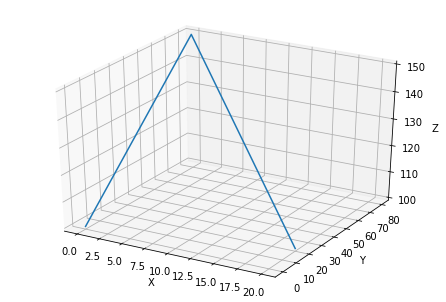

In [9]:
pc.Lijn(k1, k2, k3).plot3D()

## Vorm
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [10]:
pc.Vorm.print_help()


+--------+
|  Vorm  |
+--------+

Betreft een meetkundig 2D vorm met bijbehorende eigenschappen.

AANMAKEN VORM
    v1 = Vorm(Lijn)                 invoeren van één Lijn object
    v2 = Vorm([(0,0),(1,1),(1,0)])  direct invoeren knoopcoordinaten

EENHEID
    v.eenheid       opvragen huidige eenheid; of None als alleen getal
    v.eenheid = 'm' alle waarden in alle knoopobjecten naar 'm'
    v.gebruik_eenheid('m')   zelfde als bovenstaande, retourneert object

EIGENSCHAPPEN       naam + '_'  -->  Waarde object i.p.v. getal
    v.O             omtrek   (bijv. v.O_ geeft omtrek Waarde met eenheid)
    v.A             oppervlakte
    v.xmin v.xmax   minimum en maximum x-waarde
    v.ymin v.ymax   minimum en maximum y-waarde
    v.ncx  v.ncy    x- en y-waarde normaalkrachtencetrum (zwaartepunt)
    v.Ixx  v.Iyy    oppervlakte traagheidsmoment in x- en y-richting
    v.Ixy           traagheidsproduct (is 0 voor symmetrische vormen)
    v.I1   v.I2     hoofdtraagheidsmomenten (1 sterke richt

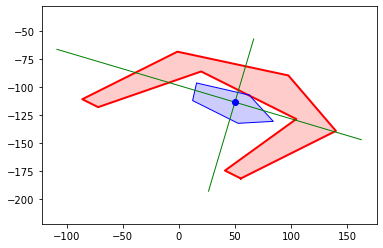


       O = 658.439 mm
       A = 6300.000 mm2
    xmin = -86.184 mm
    xmax = 140.091 mm
    ymin = -181.795 mm
    ymax = -68.658 mm
     ncx = 50.000 mm
     ncy = -113.704 mm
     Ixx = 20491327.160 mm4
     Iyy = 5122831.790 mm4
     Ixy = -5004336.420 mm4
      I1 = 21977196.459 mm4
      I2 = 3636962.492 mm4
   alpha = -16.537 deg
   Wxmin = 150468.470 mm3
   Wxmax = 227452.339 mm3
   Wymin = 37617.118 mm3
   Wymax = 56863.085 mm3
   kxmin = -36.104 mm
   kxmax = 23.884 mm
   kymin = -36.104 mm
   kymax = 23.884 mm

het grootste hoofdtraagheidsmoment is: 2.20e+07 mm4


In [11]:
v1 = pc.Vorm(pc.Lijn([-50,-40], [-40, -40], [-30, 15], [30, 15], [40, -40], [50,-40], [50,20], [0, 40], [-50, 20]).transformeren(
          rotatiepunt=None, # bij None: neemt standaard zwaartepunt
          rotatiehoek=45, # graden tegen de klok in
          schaalfactor=[-2, 1], # vergroten om rotatiepunt; negatief:spiegelen
          translatie=[50, -120] # verplaatsing
    ).gebruik_eenheid('mm'))
v1.plot()
v1.print_eigenschappen()
print(f'het grootste hoofdtraagheidsmoment is: {v1.I1:.2e} mm4')

## Rechthoek
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [12]:
pc.Rechthoek.print_help()


+-------------+
|  Rechthoek  |
+-------------+

Creeert een rechthoekig Vorm object.

AANMAKEN RECHTHOEK
    r = Rechthoek(breedte=Waarde(300).mm, hoogte=Waarde(500).mm)
    
Verder zijn alle eigenschappen van toepassing als van een Vorm object.



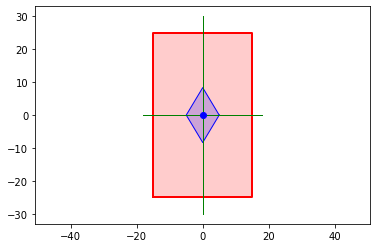

In [13]:
pc.Rechthoek(breedte=30, hoogte=50).plot()

## Cirkel
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [14]:
pc.Cirkel.print_help()


+----------+
|  Cirkel  |
+----------+

Creeert een cirkelvormig Vorm object.

AANMAKEN CIRKEL
    c = Cirkel(straal=Waarde(3).mm)
    
Vormeigenschappen worden exact bepaald, daar waar een Vorm object een ronde
rand benadert met kleine rechte lijnen.

Verder zijn alle eigenschappen en methoden van toepassing als van een
Vorm object.



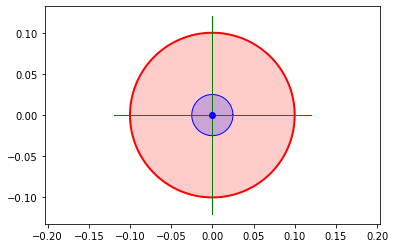

In [15]:
pc.Cirkel(straal=pc.Waarde(1).dm).gebruik_eenheid('m').plot()

## Materiaal
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>

In [16]:
pc.Materiaal.print_help()


+-------------+
|  Materiaal  |
+-------------+

Betreft een materiaal met diverse eigenschappen.

AANMAKEN MATERIAAL
    m = Materiaal(E=Waarde(210, 'GPa'),     # elasticiteitsmodulus
                  G=Waarde(75, 'GPa'),      # glijdings(schuif)modulus
                  v=Waarde(0.4),            # dwarscontractiecoëfficiënt
                                                           (Poisson factor)
                  sm=Waarde(7850, 'kg/m3'), # soortelijke massa (dichtheid)
                  sg=Waarde(78.5, 'kN/m3')) # soortelijk gewicht
    
RELATIE E, G EN v
    Indien E en v bekend zijn, dan wordt G zelf bepaald: G = E/(2(1+v))
    Indien E en G bekend zijn, dan wordt v zelf bepaald: v = (E/2G)-1
    Alledrie grootheden kunnen handmatig worden overschreven.
    
OPVRAGEN EN AANPASSEN MATERIAALEIGENSCHAPPEN
    m.E                             # retourneert Waarde object
    m.E = Waarde(180).GPa           # past waarde E aan



In [17]:
S235 = pc.Materiaal(
    E=W(210).GPa,
    G=W(75).GPa,
    sm=W(7850)['kg/m3'],
    sg=W(78.5)['kN/m3'],
    )
print(f'dwarscontractiecoëfficiënt is: {S235.v}')

dwarscontractiecoëfficiënt is: 0.3999999999999999


## Functies
<a href='#Inhoud' style='font-size:1em;float:right;position:relative;top:-40px;height:0px;'>naar inhoud</a>
Naast bovenstaande pyco objecten, zijn er ook algemene pyco functies en eigenschappen beschikbaar. Deze beginnen altijd met een kleine letter.

In [18]:
pc.functies_print_help()

+-------------------------------------------+
|  algemene pyco functies en eigenschappen  |
+-------------------------------------------+

ALGEMEEN GEBRUIK VAN FUNCTIES         alle namen met () erachter zijn functies
    pc.wortel(9) == 3.0               direct aan te roepen vanuit pc object
    
ALGEMEEN GEBRUIK VAN EIGENSCHAPPEN
    pc.pi == 3.141592653589793        direct aan te roepen vanuit pc object

WISKUNDIGE FUNCTIES                   (gebaseerd op Numpy module)
    invoerwaarden:  int, float, np.array, Waarde of Vector
    uitvoerwaarden: indien invoer Waarde/Vector, uitvoer ook Waarde/Vector met
                    ALTIJD zelfde eenheid als invoer; ook als niet correct is!!
    sin(x)                            sinus
    cos(x)                            cosinus
    tan(x)                            tangens
    asin(x)                           arcsinus (omgekeerde sin)
    acos(x)                           arccosinus (omgekeerde cos)
    atan(x)                           a

In [19]:
v = pc.Vector(3, 4, 7).mm
print(f"het gemiddelde van vector v is: {pc.gemiddelde(v)}")

het gemiddelde van vector v is: 4.666666666666667 mm
